In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx

# 누가 만든거

In [ ]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

    #usage : df, NAlist = reduce_mem_usage(df)
    #        print(NAlist)

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

- 처음~2020.4월 : 거리두기 시작
- 2020.5월 : 생활방역 전환
- 2020.6월~8월 : 수도권 2단계
- 2020.9월 : 2.5단계 강화
- ~~2020.9월 : 거리두기 2단계로 하향~~
- 2020.10월 : 1단계 하향
- 2020.11월 : 정밀방역으로 세분화
- 2020.12월 : 2단계 시행
- ~~2020.12월 : 2.5단계 시행~~

+ 2021.1월~2월 : 2.5단계, 조치 완화
+ ~~2021.2월 : 2단계 완화~~
+ 2021.3월~6월 : 거리두기 개편
+ 2021.07월 거리두기 4단계

- 2022.8월~4월?? : 거리두기 해제?

In [3]:
with open("../참고 데이터/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata

,소분류,읍면동
0,1101053,사직동
1,1101054,삼청동
2,1101055,부암동
3,1101056,평창동
4,1101057,무악동
...,...,...
410,1125070,둔촌1동
411,1125071,둔촌2동
412,1125072,암사1동
413,1125073,천호2동


In [4]:
# 2020년 4월까지
from os import listdir
import pandas as pd

filenames0 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202002/")]
filenames1 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202003/")]
filenames2 = ["../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/"+f for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202004/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1], 
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1] + [pd.read_csv(f, encoding='cp949') for f in filenames2]
data = pd.concat(yo, 
                ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']

# 4개달 데이터 합치고 쓱싹쓱싹한게 6분 51.9초

# 처음 3개달 데이터 합치고 ㅆㅆㅆㅆ한게 5분 0.4초

25607602
도착 시군구 코드
금천구     17719590
도봉구     20089180
양천구     20727440
강북구     22603350
구로구     22674300
중랑구     23009250
은평구     23235960
강동구     24248160
동작구     24278170
서대문구    24383630
용산구     24480220
광진구     24483450
성동구     25102210
관악구     25741240
동대문구    25855080
노원구     26231740
종로구     26251430
강서구     26395600
성북구     26516920
영등포구    26947700
중구      26990820
마포구     28011560
송파구     29546970
서초구     29562010
강남구     33452970
Name: 평균 이동 시간(분), dtype: int64


# 재정렬

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


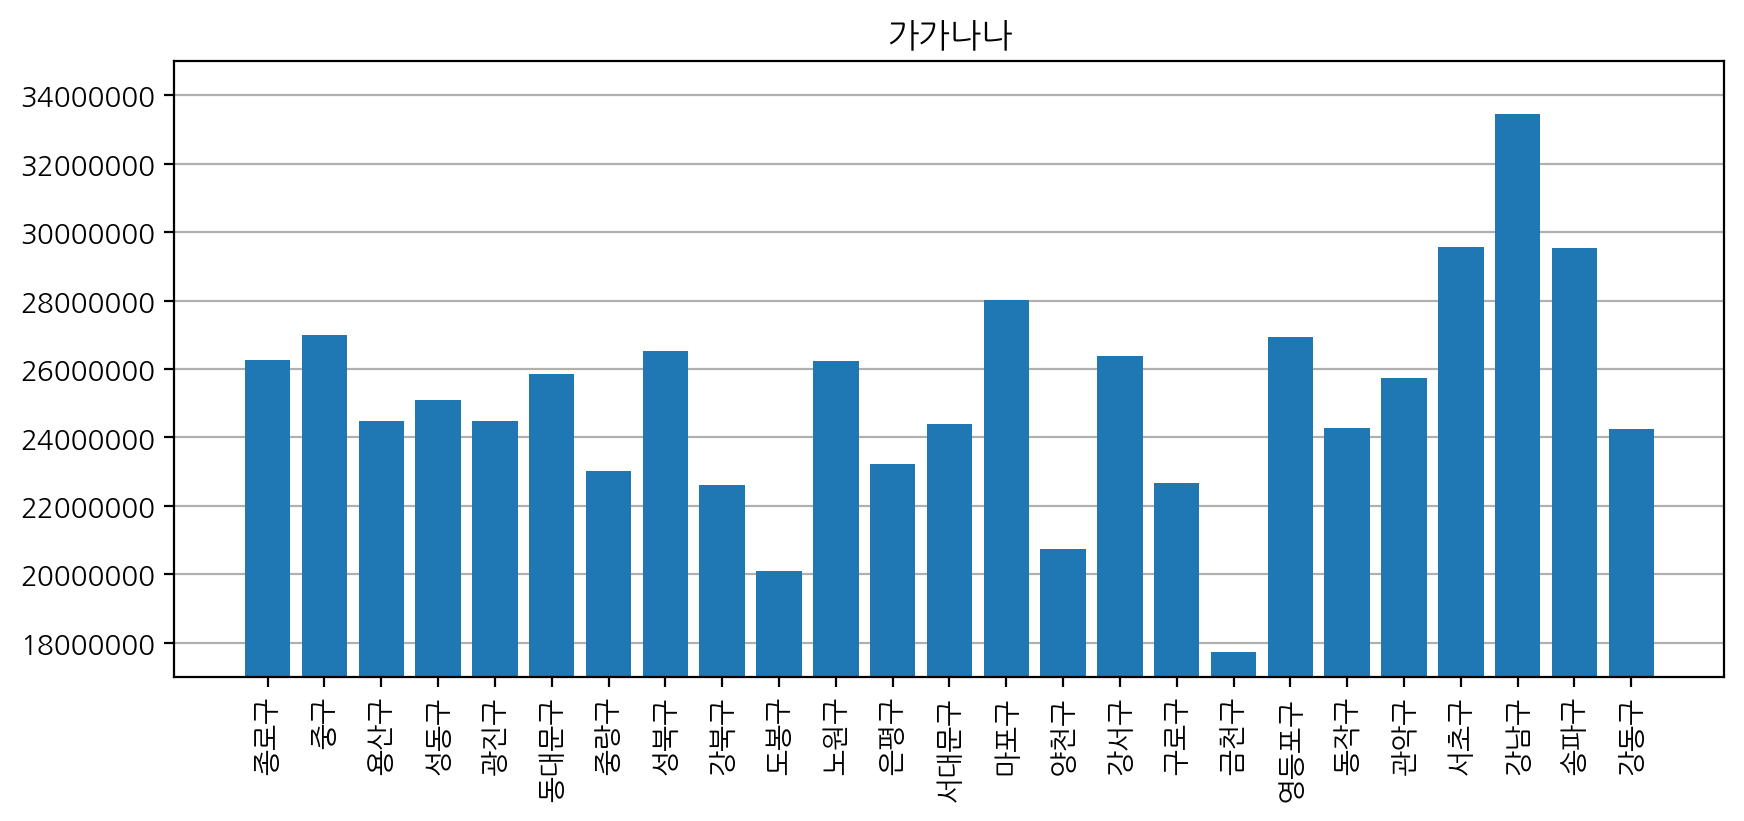

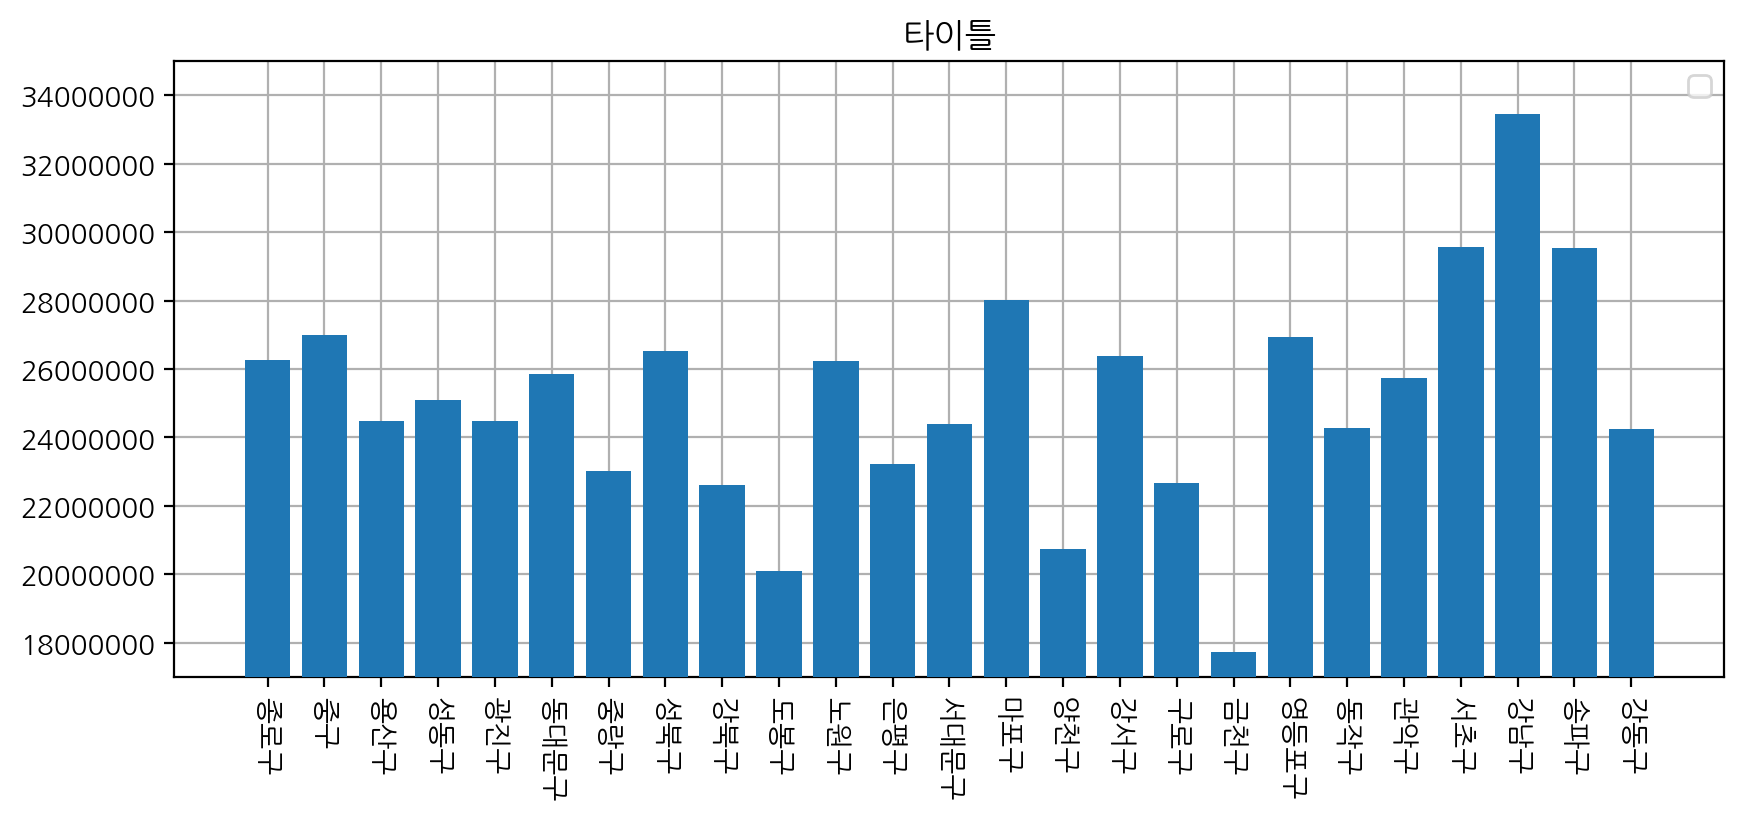

In [6]:
#data2point5.중랑구
d = data2point5
x = ['종로구', '중구', '용산구','성동구','광진구','동대문구','중랑구',
 '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구',
    '마포구', '양천구', '강서구', '구로구', '금천구','영등포구','동작구',
    '관악구','서초구','강남구','송파구','강동구']
y = [d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구,  d.도봉구 ,
d.노원구,  d.은평구,  d.서대문구, d.마포구, d.양천구,  d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구, d.관악구,
d.서초구, d.강남구, d.송파구, d.강동구 ]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10,4)
ax.grid(axis='y')
ax.bar(x,y)
ax.set_ylim(17000000,35000000)
ax.set_xticks(range(25),x,rotation=90)
ax.ticklabel_format(style='plain',axis='y') 
ax.set_title("가가나나")
ax.set_axisbelow(True)
fig.show()

plt.figure(figsize=(10,4))
plt.ylim(17000000,35000000)
plt.grid(zorder=0)
plt.bar(x, y, zorder=3)
plt.xticks(range(25), x, rotation=180+90)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.title("타이틀")
plt.savefig("../작업 결과물/소중한 그래프(2021년 1~4월 도착인구 뭉탱이).png", dpi=96)
plt.show()


# ㅁㄴㅇㄹ

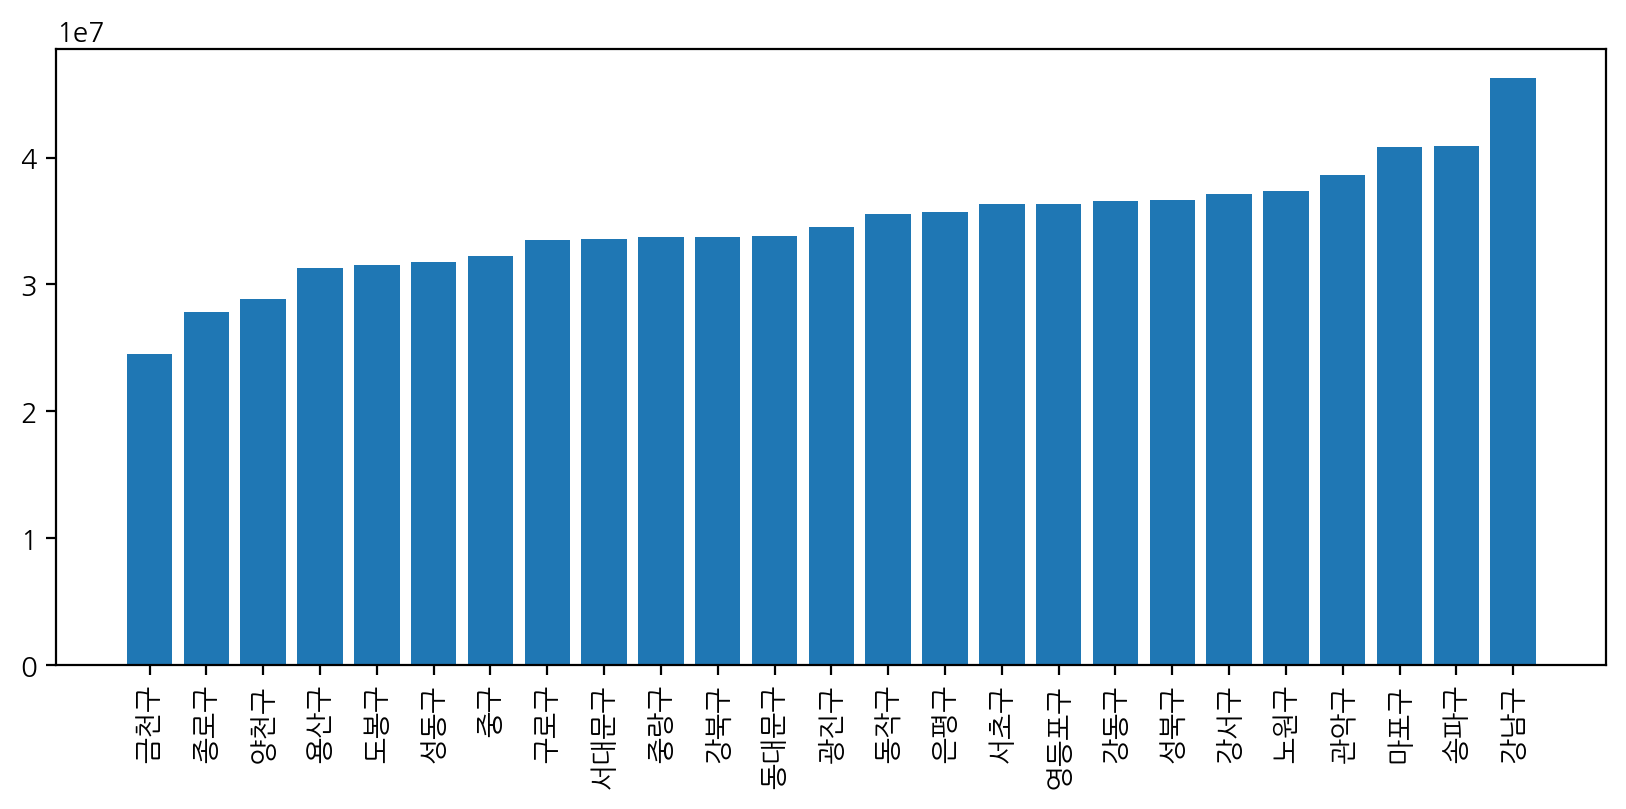

In [8]:
plt.figure(figsize=(10,4))
plt.bar(regions, data2point5)
plt.xticks(range(25), regions, rotation=90)
plt.savefig("../작업 결과물/소중한 그래프(2021년 1~4월 도착인구 뭉탱이).png", dpi=96)
plt.show()
종로,
 종구, 
 용산구, 
 성동구, 
 광진구, 
 동대문구, 
 중랑구, 
 성북구, 
 강북구, 
 구로구, 
 금천구, 
 영등포구, 
 동작구, 
 관악구, 
 서주구, 
 강남구, 
 송파구, 
 강동구

# 2020년6월~8월

In [66]:
# 2020년 6월에서 8월까지

from os import listdir
import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202006/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202006/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202007/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202007/")
]
filenames2 = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202008/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202008/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] \
    + [pd.read_csv(f, encoding='cp949') for f in filenames1] \
    + [pd.read_csv(f, encoding='cp949') for f in filenames2]
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
                      ])['평균 이동 시간(분)'].sum().sort_values()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'
                            ])['평균 이동 시간(분)'].sum().sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]


28304580
도착 시군구 코드
금천구     19765250
도봉구     22412200
양천구     23448800
강북구     24787700
구로구     25367020
중랑구     25400020
은평구     26122390
서대문구    26638330
용산구     26835810
동작구     27000510
강동구     27036040
광진구     27504780
성동구     27606570
동대문구    28422680
관악구     28565940
종로구     29174750
성북구     29203060
노원구     29212650
중구      29442380
강서구     29927390
영등포구    30250770
마포구     30870020
서초구     33168530
송파구     33294060
강남구     37488610
Name: 평균 이동 시간(분), dtype: int64


# 재정렬

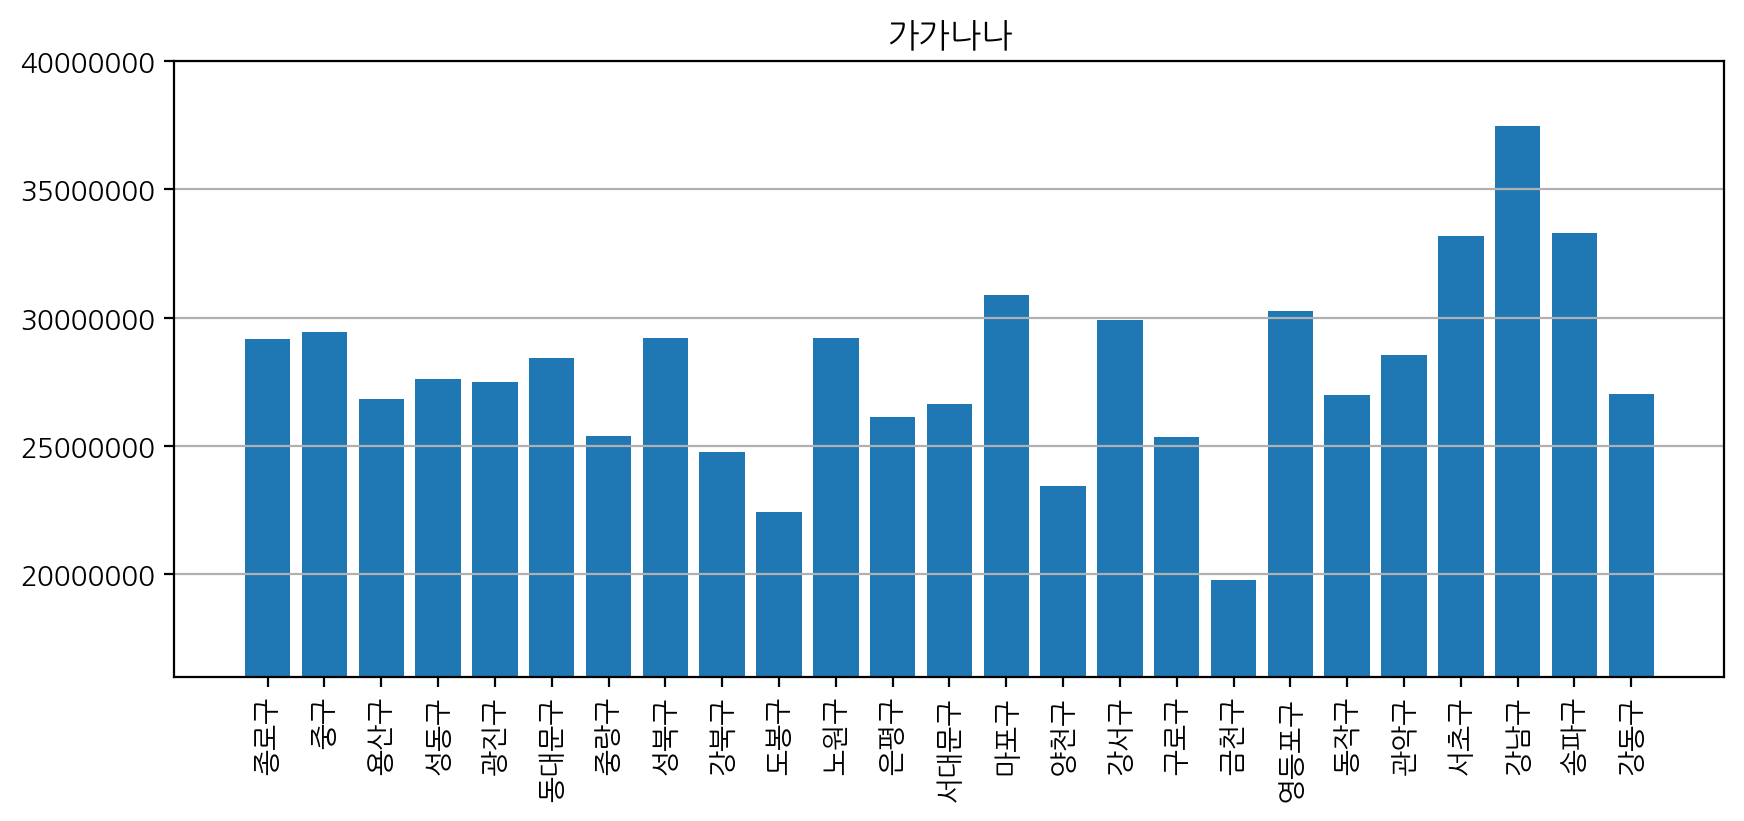

In [68]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(16000000, 40000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("가가나나")
fig.savefig("../작업 결과물/소중한 그래프(2020년 6~8월 도착인구 뭉탱이).png", dpi=96)
fig.show()

# 2021년 1월에서 2월까지

In [69]:
# 2021년 1월에서 2월까지
from os import listdir
import pandas as pd

filenames0 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202101/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202101/")
]
filenames1 = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202102/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202102/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] \
    + [pd.read_csv(f, encoding='cp949') for f in filenames1] 
data = pd.concat(yo, ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
                      ])['평균 이동 시간(분)'].sum().sort_values()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'
                            ])['평균 이동 시간(분)'].sum().sort_values()  #.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = [
    '금천구', '종로구', '양천구', '용산구', '도봉구', '성동구', '중구', '구로구', '서대문구', '중랑구',
    '강북구', '동대문구', '광진구', '동작구', '은평구', '서초구', '영등포구', '강동구', '성북구', '강서구',
    '노원구', '관악구', '마포구', '송파구', '강남구'
]


16782422
도착 시군구 코드
금천구     11693890
도봉구     13246270
양천구     13929230
강북구     14585080
구로구     14984900
중랑구     14997570
은평구     15326770
용산구     15673830
서대문구    15676800
동작구     15877310
강동구     15959360
광진구     16037580
성동구     16388800
관악구     16833640
동대문구    16870270
종로구     17004640
노원구     17125770
중구      17278320
성북구     17397180
마포구     17760930
강서구     17766130
영등포구    17998490
서초구     19779560
송파구     19948020
강남구     22379600
Name: 평균 이동 시간(분), dtype: int64


# 재정렬

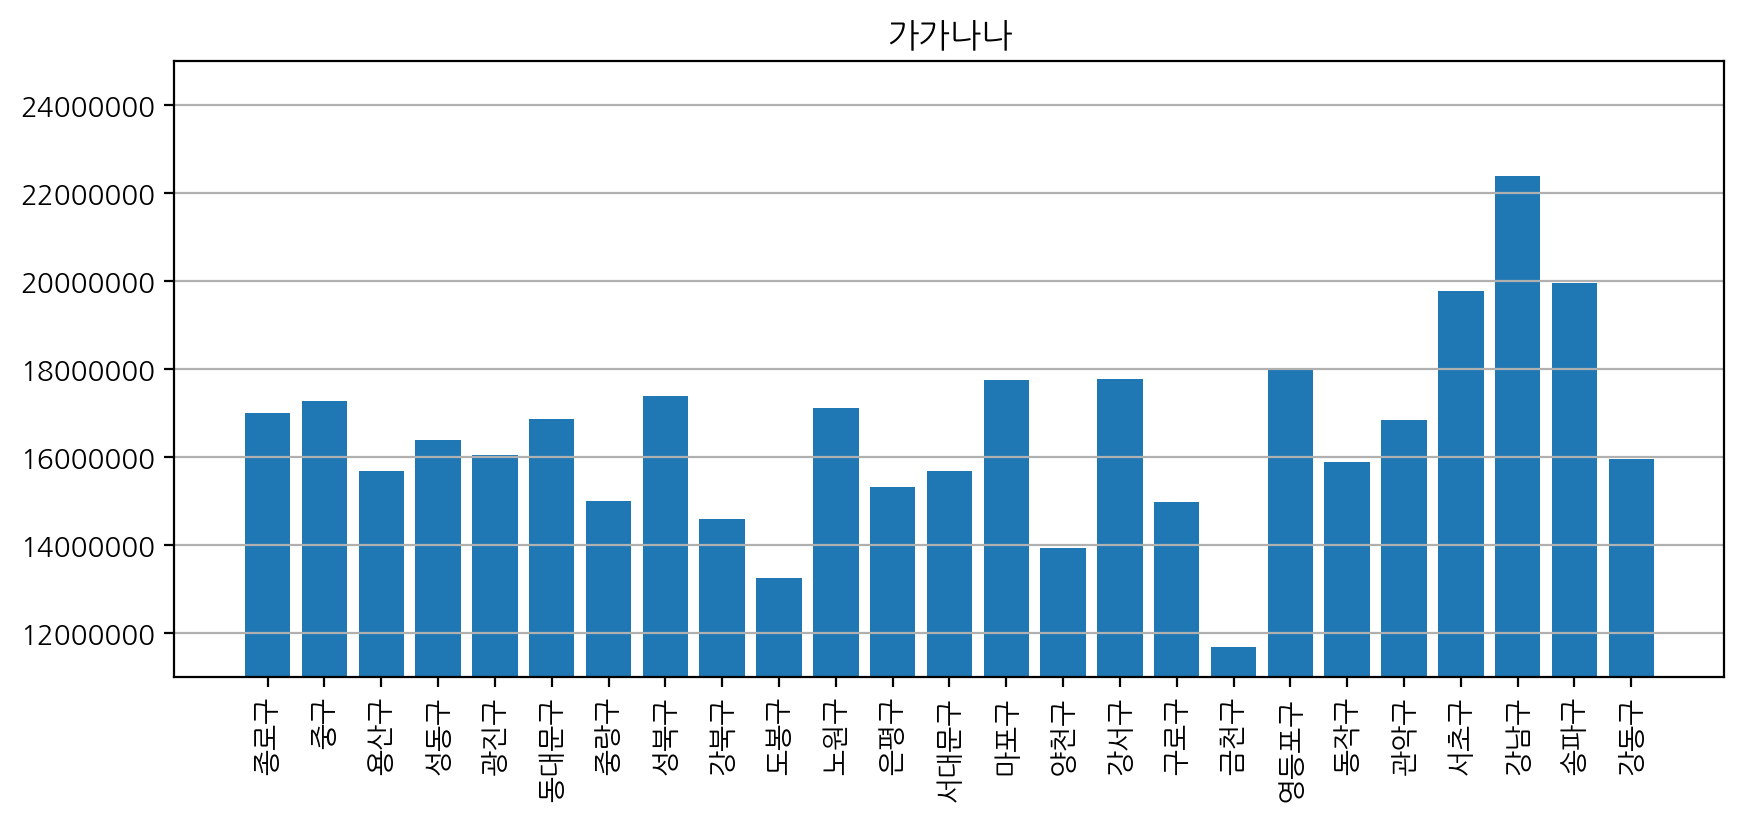

In [71]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(11000000, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("가가나나")
fig.savefig("../작업 결과물/소중한 그래프(2021년 1월~2월 도착인구 뭉탱이).png", dpi=96)
fig.show()

# 2021년 3월에서 4월까지

In [4]:
# 2021년 3월에서 6월까지
from os import listdir
import pandas as pd

filenames0 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202103/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202103/")]
filenames1 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202104/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202104/")]
# filenames2 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/")]
# filenames3 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1], 
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1]
data = pd.concat(yo, 
                ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']


18362021
도착 시군구 코드
금천구     12843010
도봉구     14470970
양천구     15264250
강북구     15999760
구로구     16381950
중랑구     16384030
은평구     16704610
서대문구    17170610
용산구     17247650
동작구     17418030
강동구     17545830
광진구     17619260
성동구     18017270
관악구     18322540
동대문구    18398510
노원구     18694750
종로구     18817480
성북구     18937030
중구      19089860
강서구     19536210
마포구     19541200
영등포구    19799920
서초구     21436960
송파구     21612300
강남구     24059100
Name: 평균 이동 시간(분), dtype: int64


# 재정렬

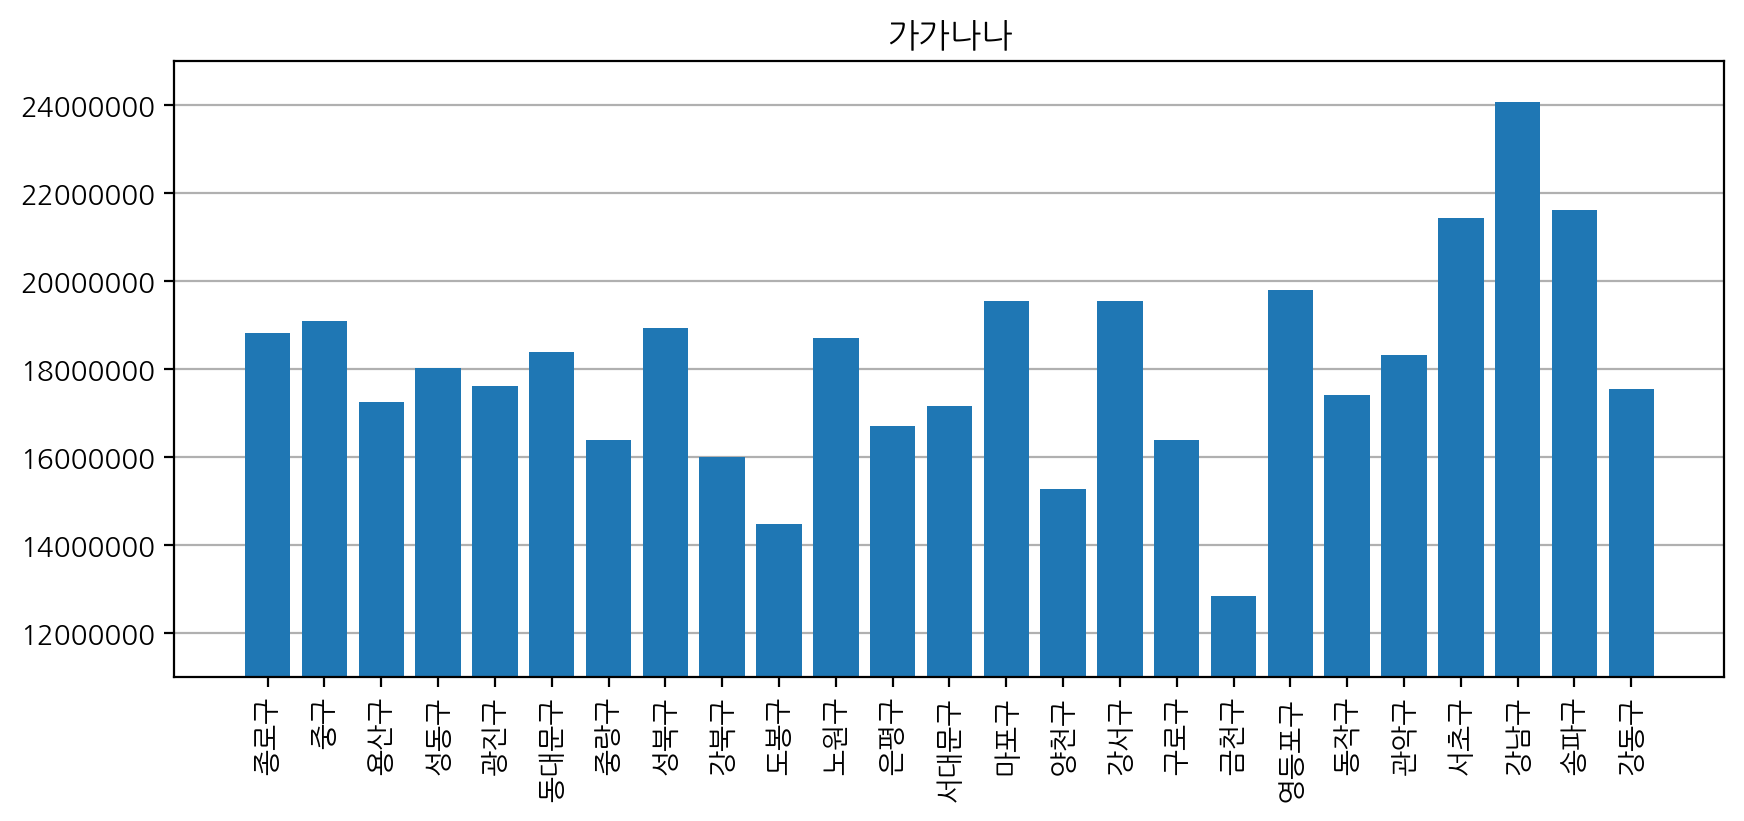

In [5]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(11000000, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("가가나나")
fig.savefig("../작업 결과물/소중한 그래프(2021년 3월~6월 도착인구 뭉탱이).png", dpi=96)
fig.show()

# 2021년 5월~6월

In [6]:

from os import listdir
import pandas as pd

filenames0 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/")]
filenames1 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/")]
# filenames2 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202105/")]
# filenames3 = ["../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/"+f for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202106/")]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1], 
#                 ignore_index=True)
yo = [pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1]
data = pd.concat(yo, 
                ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

tst = {key:value for key,value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]
regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']


18771442
도착 시군구 코드
금천구     13206170
도봉구     14934750
양천구     15609780
강북구     16476050
구로구     16869350
중랑구     16923210
은평구     17169000
서대문구    17594530
용산구     17777610
동작구     17813380
광진구     18109650
강동구     18111200
성동구     18480530
관악구     18669180
동대문구    18789300
노원구     19151460
종로구     19162970
성북구     19307840
중구      19375490
마포구     20091990
영등포구    20203680
강서구     20280470
서초구     21935220
송파구     22207980
강남구     24615600
Name: 평균 이동 시간(분), dtype: int64


# 재정렬

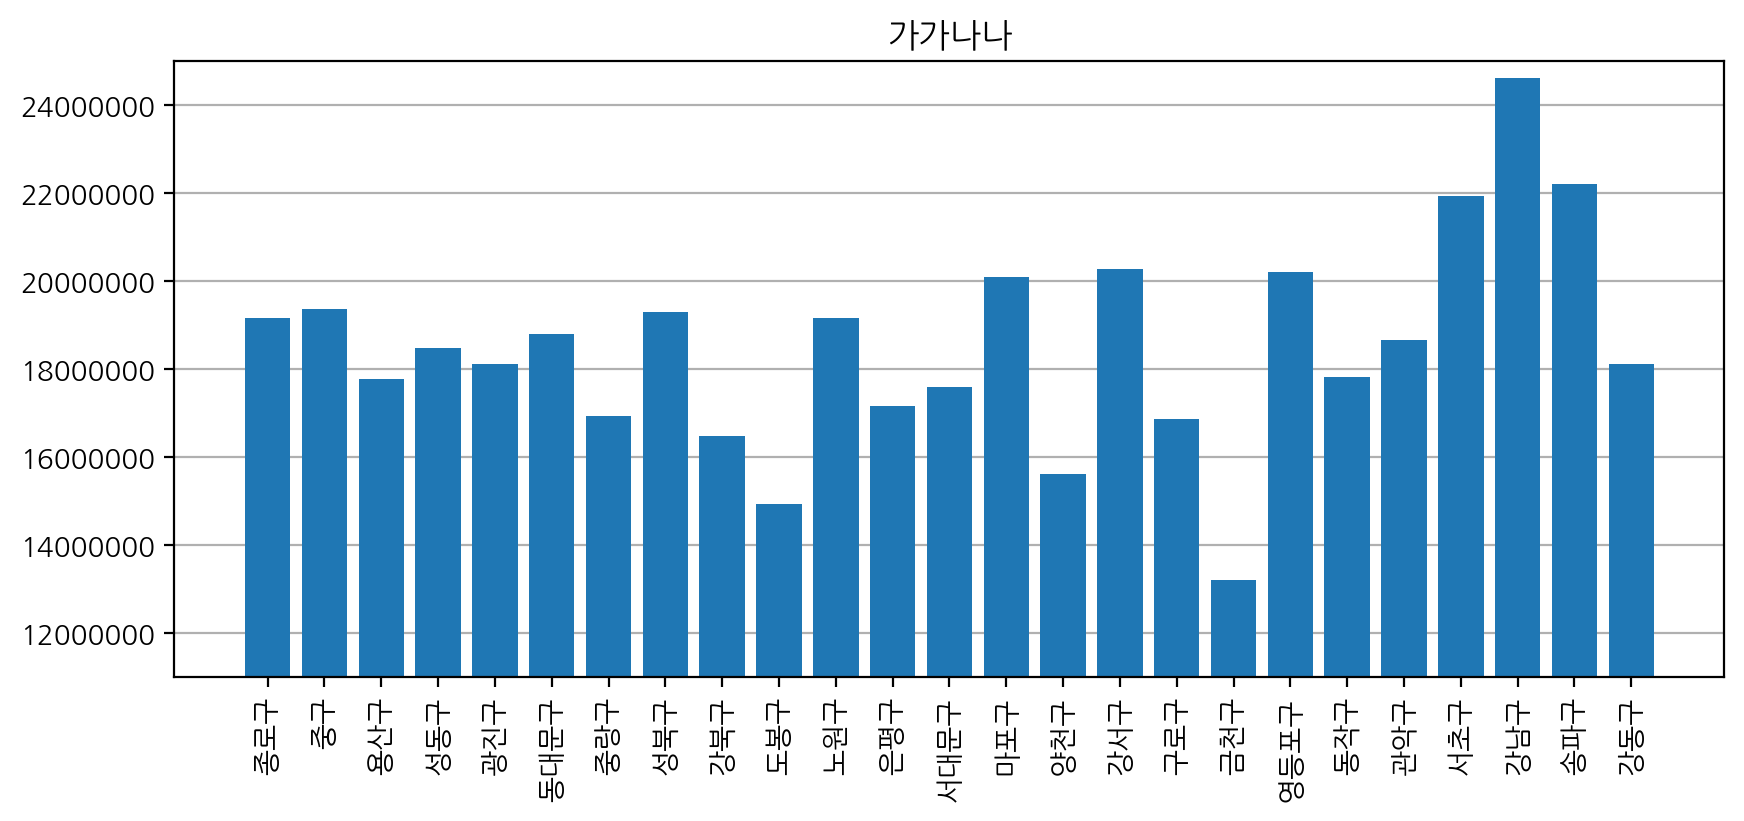

In [7]:
d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(11000000, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_axisbelow(True)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("가가나나")
fig.savefig("../작업 결과물/소중한 그래프(2021년 3월~6월 도착인구 뭉탱이).png", dpi=96)
fig.show()

# 나머지 뭉탱이